# Import needed libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import os

# Initial settings

Let's set up Chrome options by using the `Options` module of `selenium` package.

In [2]:
#creates an instance of the Options class
chrome_options = Options()

#In headless mode, Chrome operates without a graphical user interface (GUI), 
#meaning that it runs in the background without opening a visible browser window
chrome_options.add_argument("--headless")

#Disabling the GPU avoids errors related to the graphical environment that might occur otherwise
chrome_options.add_argument("--disable-gpu")

#Sandboxing is a security mechanism that restricts what the Chrome process can do, enhancing security.
#However, the sandboxing can cause permission issues and prevent Chrome from launching properly.
chrome_options.add_argument("--no-sandbox")

In [3]:
# Path to your ChromeDriver executable
chromedriver_path = os.getcwd()+os.sep+'chromedriver-win64\\chromedriver.exe'  

# Set up the ChromeDriver service
service = Service(chromedriver_path)

# Initialize the WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

In [4]:
#Definition of a link dictionary.
link_tournaments = {
    'Italy - Serie A': 'https://www.livescore.com/en/football/italy/serie-a/table/',
    'Italy - Serie B': 'https://www.livescore.com/en/football/italy/serie-b/table/',
    'England - Premier League': 'https://www.livescore.com/en/football/england/premier-league/table/',
    'Spain - La Liga': 'https://www.livescore.com/en/football/spain/laliga/table/',
    'Germany - Bundesliga': 'https://www.livescore.com/en/football/germany/bundesliga/table/',
    'France - Ligue 1': 'https://www.livescore.com/en/football/france/ligue-1/table/',
    'Portugal - Primeira Liga': 'https://www.livescore.com/en/football/portugal/primeira-liga/table/',
    'Netherlands - Eredivise': 'https://www.livescore.com/en/football/netherlands/eredivisie/table/',
    'Belgium - Jupiler League':'https://www.livescore.com/en/football/belgium/belgian-pro-league/table/',
    'Turkey - Super Lig': 'https://www.livescore.com/en/football/turkiye/super-lig/table/',
    'Argentina - Liga Profesional':'https://www.livescore.com/en/football/argentina/primera-division/table/',
    'Brasil - Serie A':'https://www.livescore.com/en/football/belgium/belgian-pro-league/table/',
    'Saudi Arabia - Saudi Professional League':'https://www.livescore.com/en/football/saudi-arabia/saudi-professional-league/table/',
    'Denmark - Superliga':'https://www.livescore.com/en/football/denmark/superliga/table/',
    'Ireland - Premier Division':'https://www.livescore.com/en/football/ireland/premier-division/table/',
    'Scotland - Premiership':'https://www.livescore.com/en/football/scotland/scotland-premiership/table/',
    'Switzerland - Super League':'https://www.livescore.com/en/football/switzerland/super-league/table/',
    'USA - MLS':'https://www.livescore.com/en/football/usa/major-league-soccer/table/'
}

# Webscraping process

Web scraping scripts can fail if they try to interact with elements that have not fully loaded. Using `WebDriverWait` helps prevent such errors by ensuring elements are available before the script tries to interact with them.

This adds reliability and robustness to the web scraping or automated testing process by preventing scripts from breaking due to element loading delays.

In [5]:
# Open the webpage, let's suppose we want to scrape the La Liga tournament
driver.get(link_tournaments['Spain - La Liga'])

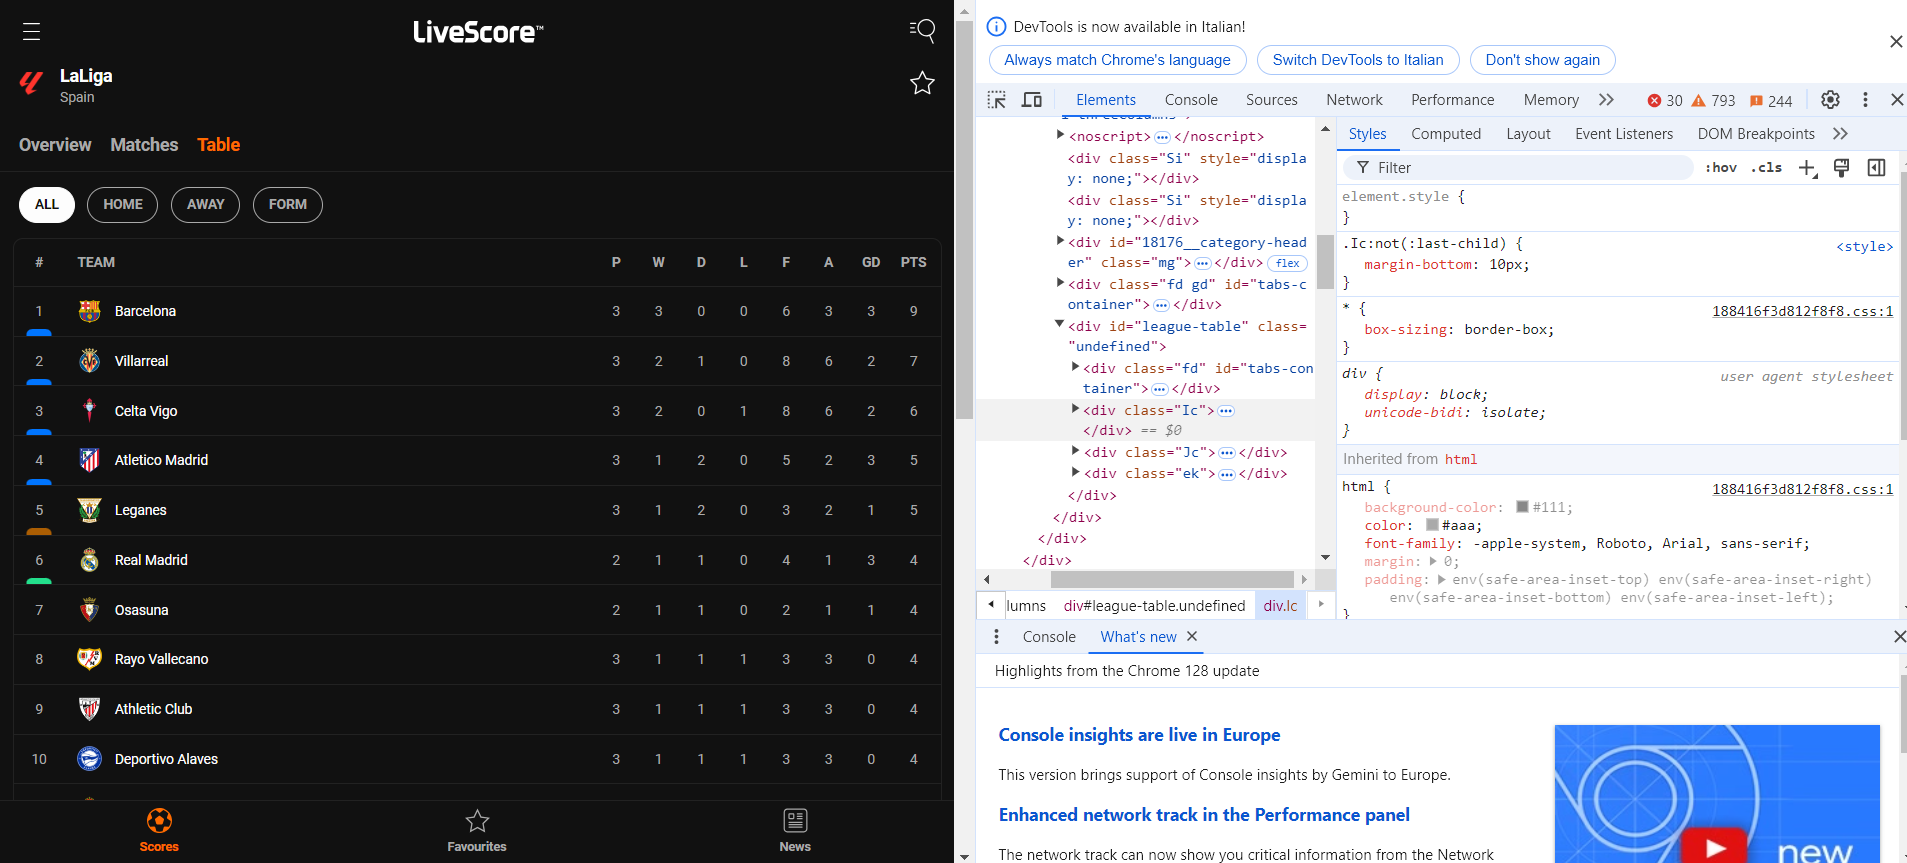

In [6]:
# Error Handling: wait until the table is loaded for a maximum of 10 seconds
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.XPATH, '//*[@id="league-table"]/div[2]'))  
)
#the XPath has been directly retrieved by inspecting the webpage

<selenium.webdriver.remote.webelement.WebElement (session="c32b46e0e421e7c8eee2dfb75c04de06", element="f.810CE0FC14B9FBBB9363EA992D372C87.d.EDA3114BD2016A7D2FA4F57ECC4FFD80.e.42")>

In [7]:
# Find the table body
table_body = driver.find_element(By.XPATH, ' //*[@id="league-table"]/div[2]')

In [8]:
#Let's see the content of table_body
table_body.text

'# TEAM P W D L F A GD PTS\n1\nBarcelona\n3 3 0 0 6 3 3 9\n2\nVillarreal\n3 2 1 0 8 6 2 7\n3\nCelta Vigo\n3 2 0 1 8 6 2 6\n4\nAtletico Madrid\n3 1 2 0 5 2 3 5\n5\nLeganes\n3 1 2 0 3 2 1 5\n6\nReal Madrid\n2 1 1 0 4 1 3 4\n7\nOsasuna\n2 1 1 0 2 1 1 4\n8\nRayo Vallecano\n3 1 1 1 3 3 0 4\n9\nAthletic Club\n3 1 1 1 3 3 0 4\n10\nDeportivo Alaves\n3 1 1 1 3 3 0 4\n11\nReal Valladolid\n3 1 1 1 1 3 -2 4\n12\nReal Sociedad\n3 1 0 2 3 4 -1 3\n13\nGetafe\n2 0 2 0 1 1 0 2\n14\nReal Betis\n2 0 2 0 1 1 0 2\n15\nSevilla\n3 0 2 1 3 4 -1 2\n16\nMallorca\n3 0 2 1 1 2 -1 2\n17\nLas Palmas\n2 0 1 1 3 4 -1 1\n18\nEspanyol\n3 0 1 2 0 2 -2 1\n19\nGirona\n2 0 1 1 1 4 -3 1\n20\nValencia\n3 0 0 3 2 6 -4 0\nCup result provided 1 additional position in UEFA Europa League'

In [9]:
# Split the text into lines
lines = table_body.text.split('\n')
indexes = [0,len(lines)-1]
for index in sorted(indexes, reverse=True):
    del lines[index]

In [10]:
# Initialize an empty list to hold the data
data = []

# Parse the lines
i = 0  # Start from the first team position
while i < (len(lines)-2):
    # Extract position, team name, and stats
    position = lines[i].strip()  # Get position
    team = lines[i + 1].strip()  # Get team name
    stats = lines[i + 2].strip().split()  # Get stats as list

    # Append the combined row of data
    data.append([position, team] + stats)
    
    # Move to the next team's data (increment by 3 lines)
    i += 3

# Define column names
columns = ['Position', 'TeamName', 'Played', 'W', 'D', 'L', 'G scored', 'G conceded', 'GD', 'PTS']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert numeric columns to integers
numeric_columns = ['Position', 'Played', 'W', 'D', 'L', 'G scored', 'G conceded', 'GD', 'PTS']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df

,Position,TeamName,Played,W,D,L,G scored,G conceded,GD,PTS
0,1,Barcelona,3,3,0,0,6,3,3,9
1,2,Villarreal,3,2,1,0,8,6,2,7
2,3,Celta Vigo,3,2,0,1,8,6,2,6
3,4,Atletico Madrid,3,1,2,0,5,2,3,5
4,5,Leganes,3,1,2,0,3,2,1,5
5,6,Real Madrid,2,1,1,0,4,1,3,4
6,7,Osasuna,2,1,1,0,2,1,1,4
7,8,Rayo Vallecano,3,1,1,1,3,3,0,4
8,9,Athletic Club,3,1,1,1,3,3,0,4
9,10,Deportivo Alaves,3,1,1,1,3,3,0,4


# Download

Store the dataframe as the `...\standings.csv` file

In [11]:
df.to_csv(os.getcwd()+os.sep+'standings_livescore.csv',index=False)